This notebook is based off of the [deep learning](https://github.com/fastai/fastai/blob/master/courses/dl1/lesson1.ipynb) lesson from fastai 

# Imports and Paths

In [1]:
from data_sci.fastai_dl_course import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
PATH = '/data/msnow/data_science/dogscats/'

In [4]:
!ls -lah {PATH}

total 1.6G
drwxrwxr-x. 7 msnow msnow  154 Jun  4 13:14 .
drwxrwxr-x. 8 msnow msnow  107 Jun  3 19:46 ..
-rw-rw-r--. 1 msnow msnow 800M Jun  4 13:18 dogscats.tar.gz
drwxrwxr-x. 2 msnow msnow    6 Jun  4 12:13 models
-rw-rw-r--. 1 msnow msnow  87K Jun  3 19:51 sampleSubmission.csv
drwxr-xr-x. 2 msnow msnow 300K Sep 20  2013 test
-rw-rw-r--. 1 msnow msnow 272M Jun  3 19:51 test1.zip
drwxrwxr-x. 5 msnow msnow  108 Jun  4 12:13 tmp
drwxr-xr-x. 4 msnow msnow  36K Jun  3 20:00 train
-rw-rw-r--. 1 msnow msnow 544M Jun  3 19:51 train.zip
drwxrwxr-x. 4 msnow msnow  64K Jun  3 20:33 valid


# Data

We will be using the data from the kaggle competition [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats/data)

You can download the data using the kaggle pip plugin

```
kaggle competitions download -c dogs-vs-cats -p \path\to\download\directory
```

then unzip the files, create separate folders for the dogs and cats in the training set and move 1000 from each set to a separate dogs and cats folder in a validation folder.  I used pictures 10,000 to 11,000 for both the cats and dogs

## Cat Pictures

In [6]:
os.listdir(PATH)

['sampleSubmission.csv', 'test1.zip', 'train.zip', 'train', 'valid', 'test']

In [8]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [9]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

(359, 431, 3)
0 255


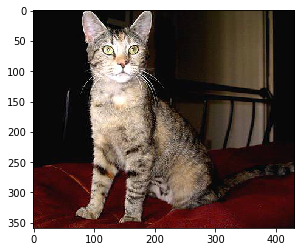

In [23]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);
print(img.shape)
print(np.min(img),np.max(img))

In [27]:
img[100:103,100:103]

array([[[218, 201, 191],
        [208, 190, 176],
        [222, 203, 189]],

       [[217, 201, 188],
        [232, 214, 200],
        [254, 235, 220]],

       [[218, 202, 189],
        [208, 190, 176],
        [215, 196, 181]]], dtype=uint8)

# Using Pre-trained Models

We're going to use a pre-trained model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point.

We will be using the resnet34 model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). 

In [6]:
arch = resnet34
sz = 32
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),bs=32)
learn = ConvLearner.pretrained(arch, data, precompute=True)
# learn.fit(0.01, 2)

/data/msnow/miniconda3/envs/data_sci/lib/python3.6/site-packages/data_sci/fastai_dl_course.py:2646: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)

  3%|▎         | 25/719 [00:18<08:21,  1.39it/s]

KeyboardInterrupt: 